In [1]:
from scipy.io import loadmat
import numpy as np
import pandas
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [3]:
parentDir = Path.cwd().parent
dataPath = parentDir / "data" / "raw" / "ninapro-db2"

In [65]:
import sys
sys.path.insert(0, str(parentDir))

In [56]:
subject_number = 1
exercise_number = 1

subject_path = dataPath / f"DB2_s{subject_number}" / f"S{subject_number}_E{exercise_number}_A1.mat"
mat_data = loadmat(subject_path)

In [57]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])

In [17]:
Fs = 2000  # Sampling frequency

In [ ]:
emg = mat_data['emg']
stimulus = mat_data['restimulus']
repetition = mat_data['rerepetition']
print("EMG shape:", emg.shape)
print("Unique gestures:", np.unique(stimulus))
print("Repetitions:", np.unique(repetition))

EMG shape: (1808331, 12)
Unique gestures: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Repetitions: [0 1 2 3 4 5 6]


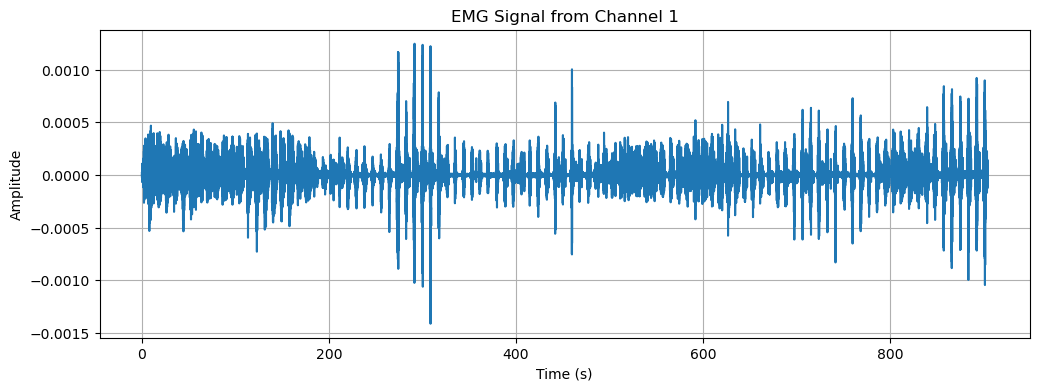

In [54]:
channel_to_plot = 0
duration_to_plot = None # in seconds; set to None to plot full duration

if duration_to_plot is None:
    duration_to_plot = int(emg.shape[0] / Fs) # Plot full duration

time = np.arange(emg.shape[0]) / Fs

plt.figure(figsize=(12, 4))
plt.plot(time[:duration_to_plot * Fs], emg[:duration_to_plot * Fs, channel_to_plot])  # Plotting the specified EMG channel for the first second
plt.title(f"EMG Signal from Channel {channel_to_plot + 1}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

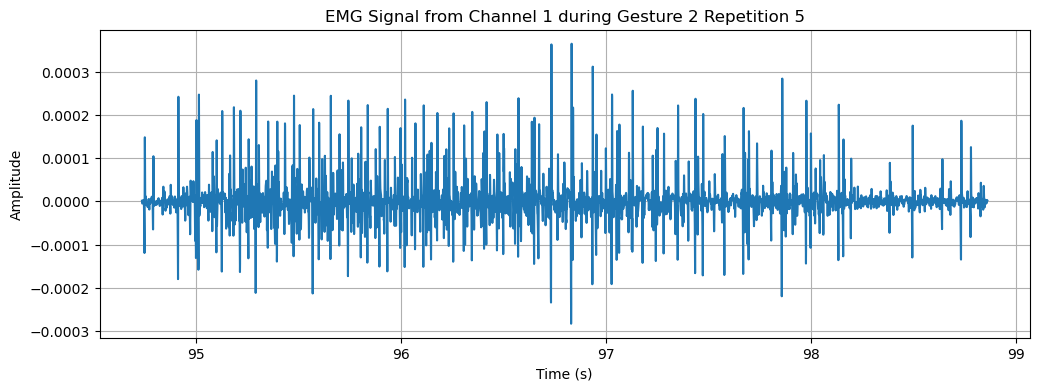

In [67]:
# Look at emg data for specific channel during specific gesture and repetition
gesture_to_plot = 2
channel_to_plot = 0
repetition_to_plot = 5

indices = np.where((stimulus.flatten() == gesture_to_plot) & (repetition.flatten() == repetition_to_plot))[0]
plt.figure(figsize=(12, 4))
plt.plot(time[indices], emg[indices, channel_to_plot])
plt.title(f"EMG Signal from Channel {channel_to_plot + 1} during Gesture {gesture_to_plot} Repetition {repetition_to_plot}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()  

In [66]:
from utils.preprocess import load_ninapro_data

dataPath = parentDir / "data" / "raw" / "ninapro-db2"
emg, stimulus, repetition, time, Fs = load_ninapro_data(subject_number=1, exercise_number=1, dataPath=dataPath)